In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

In [8]:
df_train=pd.read_csv('training.csv')
df_test=pd.read_csv('testing.csv')

In [9]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [10]:
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [11]:
target='prognosis'

In [14]:
X= df_train.drop(columns=[target])
y= df_train[target]

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, classification_report
y_val_pred = rf.predict(X_val)
print("=== Validation Performance ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

=== Validation Performance ===
Accuracy: 1.0

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold

In [25]:
print("Unique prognosis values:", df_train['prognosis'].nunique())
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print("Common rows between train and test:", pd.merge(df_train, df_test, how='inner').shape[0])


Unique prognosis values: 41
Train shape: (4920, 133)
Test shape: (41, 133)
Common rows between train and test: 3048


In [27]:
missing_cols = set(X.columns) - set(df_test.columns)
if missing_cols:
    raise ValueError(f"Missing columns in test data: {missing_cols}")

In [29]:
#Ensure test columns match training columns ---
df_test = df_test[X.columns]

#Predict using the trained Random Forest model ---
test_preds = rf.predict(df_test)

#Convert encoded predictions back to disease names ---
test_preds_labels = le.inverse_transform(test_preds)

#Save or view predictions ---
output = pd.DataFrame({'predicted_prognosis': test_preds_labels})
output.to_csv('test_predictions.csv', index=False)

print("✅ Test predictions complete!")
print(output.head())


✅ Test predictions complete!
   predicted_prognosis
0     Fungal infection
1              Allergy
2                 GERD
3  Chronic cholestasis
4        Drug Reaction


In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y_encoded, cv=5)
print("Cross-val mean accuracy:", scores.mean())


Cross-val mean accuracy: 1.0


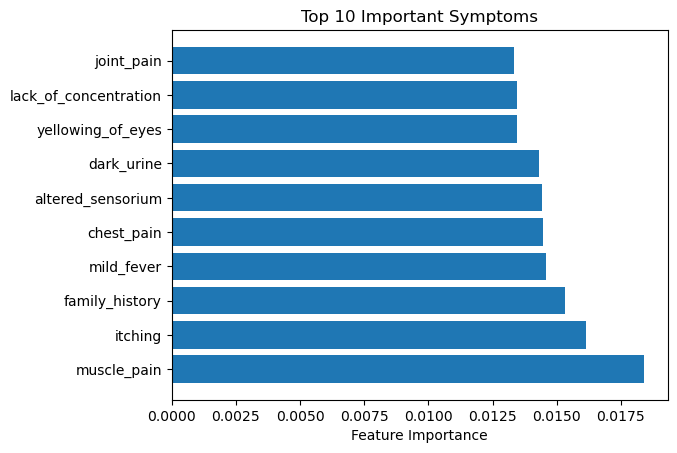

In [31]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[-10:][::-1]
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Symptoms")
plt.show()


In [32]:
import joblib
joblib.dump(rf, 'disease_model.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']